In [63]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.constants import e, epsilon_0, pi # They're expressed in SI

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  

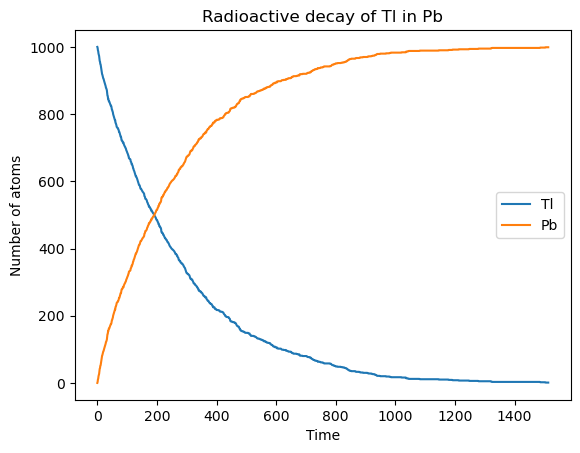

In [64]:
# Compute tau in seconds
hl_s = 3.052*60 # Halflife in seconds
tau = hl_s # In base 2 decay we have tau = half-life

# Evolution in time of Tl and Pb atoms
nTl = 1000 # initialize the number of atoms
nPb = 0
nTl_evolution = []
nPb_evolution = []
t_evolution = []
t = 0 # Initialize time at zero
p = 1 - 2**(-(1/tau)) # The probability of decaying is the same at each time step
while nTl > 0: 
    nTl_evolution.append(nTl)
    nPb_evolution.append(nPb)
    t_evolution.append(t)
    t+=1 #Update time --> we're now lookin at what happens at one second
    ndec = 0 # initialize the number of decayed Tl atoms at this step
    for Tlatom in range(nTl): 
        ndec += npr.choice([0,1], p = [1 - p,p]) # get the number of decayed particles at each step (0 or 1)
    nTl -= ndec
    nPb += ndec

plt.plot(t_evolution, nTl_evolution, label = 'Tl')
plt.plot(t_evolution, nPb_evolution, label = 'Pb')
plt.xlabel('Time')
plt.ylabel('Number of atoms')
plt.title('Radioactive decay of Tl in Pb')
plt.legend()


* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time. 

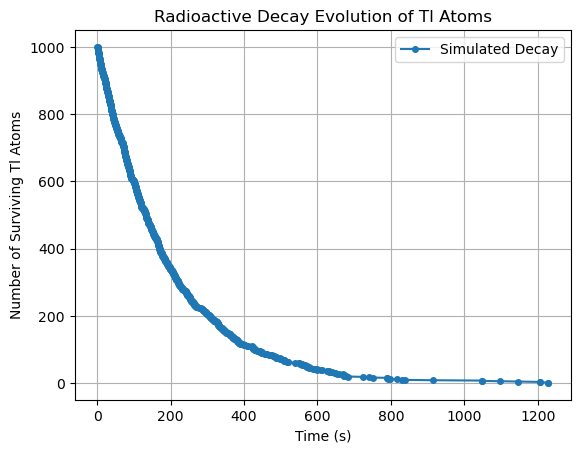

In [65]:
# Analitically we can compute the CDF of p(t) --> integral from 0 and t of p(t')
# If we extract z with uniform distribution in [0,1] then we have z = (CDF(t))
# Inverting that relation we obtain t(z) distributed according to p(t)

z = npr.uniform(size = 1000)
decay_times = np.sort(-tau*np.log(1-z))
survived = []
nTl = 1000
"""for time in (decay_times): # Plus one because in the list I have also time zero
    nTl -= 1
    survived.append(nTl) """
survived = nTl - np.arange(nTl) # This way is more efficient

plt.plot(decay_times, survived, marker='o', linestyle='-', markersize=4, label="Simulated Decay")
plt.xlabel("Time (s)")
plt.ylabel("Number of Surviving Tl Atoms")
plt.title("Radioactive Decay Evolution of Tl Atoms")
plt.legend()
plt.grid()
plt.show()


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Compute the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [66]:
# Initialize constants

Z = 79  # Atomic number of gold
E_MeV = 7.7  # Energy in MeV
E = E_MeV * 1.6e-13  # Energy in Joules
a0 = 5.29e-11  # Bohr radius in meters
sigma = a0 / 100  # Standard deviation of Gaussian distribution
n = int(1e6) # Number of alopha particles 

# Let's simulate the beam
mean_b = np.zeros(2)
cov_b = np.diag([sigma**2]*2)
b = npr.multivariate_normal(mean_b, cov_b, size = n) # Shape (1000,2) which means that each line is a [bx, by] couple
r = np.sqrt(b[:,0]**2 + b[:,1]**2)# Radial distance (magnitude of impact parameter)

# To meet the condition of "bouncing back" we need b to be less than b_cr for which tan(theta/2) = tan (np.pi/4) = 1
b_cr = (Z * e**2) / (2 * pi * epsilon_0 * E)
less_cr = r[r<b_cr]# Find the particles that have b less than b_cr
fraction = len(less_cr)/len(r)

print(f"The fraction of particles that 'bounce back' is: {fraction}")

The fraction of particles that 'bounce back' is: 0.001583


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate

Integral value with hit-miss method 1.4700 ± 0.0279


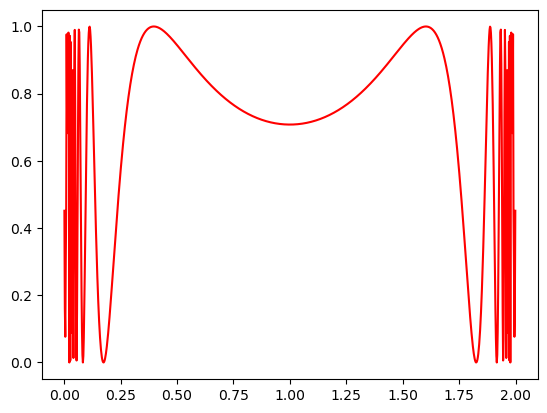

In [96]:
# Define the function
def f(x): 
    return (np.sin(1/(x*(2-x))))**2

# Have a look at the plot
x = np.linspace(0.001,1.999,1000)
plt.plot(x,f(x), 'r')

# Monte Carlo integration with hit-miss method
N = 1000
count = 0
for i in range(N): 
    x = 2*npr.random() # Random numbers with uniform distribution in [0.0, 1.0). Multiplied by two because of the x_domain that you can see from the graph. 
    y = npr.random() 
    if y<f(x): count+=1
I = 2*count/N

# Evaluate the error of your estimate
p = count/N
error = 2*(np.sqrt(p*(1-p)/N))

# Print the result
print(f"Integral value with hit-miss method {I:.4f} ± {error:.4f}")

* Repeat the integral with the mean value method. Evaluate the error.

In [97]:
# Monte Carlo integration with mean-value method
N = 1000
x_sample = npr.uniform(0.001,1.999, N)
I_mv = (2/N)*np.sum(f(x_sample))

# Evaluate the error of your estimate
sigma = (2*f(x_sample).std())/np.sqrt(N)

# Print the result
print(f"Integral value with hit-miss method {I_mv:.4f} ± {sigma:.4f}")

Integral value with hit-miss method 1.4071 ± 0.0177


* Compare the results

([<matplotlib.axis.XTick at 0x15f7094c0>,
 [Text(1, 0, 'HM'), Text(2, 0, 'MV')])

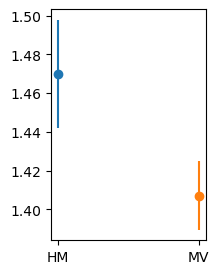

In [98]:
plt.figure(figsize = (2,3))
plt.errorbar(1, I, yerr = error, fmt = 'o')
plt.errorbar(2, I_mv, yerr = sigma, fmt = 'o')
plt.xticks(ticks = [1,2], labels = ['HM','MV'])

**COMMENT:**
As N increases (for example from 1000 to 5000) the result gets much better, as expected. 

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [99]:
# 2D Circle: Indicator function for unit circle
def f_2d_circle(x, y):
    return 1 if x**2 + y**2 <= 1 else 0

# Monte Carlo estimation using Mean Value Method for 2D Circle
def mean_value_2d_circle(n_points):
    inside_count = 0
    for toss in range(n_points):
        x, y = np.random.uniform(-1, 1, 2)  # Random point in [-1,1]x[-1,1]
        inside_count += f_2d_circle(x, y)
    
    # Area of the square is 4, so the estimated area is 4 * (mean value)
    area_estimate = 4 * inside_count / n_points
    return area_estimate

# 10D Sphere: Indicator function for 10D unit sphere
def f_10d_sphere(point):
    return 1 if np.sum(np.square(point)) <= 1 else 0

# Monte Carlo estimation using Mean Value Method for 10D Sphere
def mean_value_10d_sphere(n_points, dimension=10):
    inside_count = 0
    for sample in range(n_points):
        point = np.random.uniform(-1, 1, dimension)  # Random point in [-1,1]^dimension
        inside_count += f_10d_sphere(point)
    
    # Volume of the hypercube is 2^dimension
    volume_estimate = (2**dimension) * inside_count / n_points
    return volume_estimate

# Parameters
n_points = 1000000  # Number of random points

# Estimate area of 2D circle
estimated_area_2d = mean_value_2d_circle(n_points)
print(f"Estimated area of the 2D unit circle: {estimated_area_2d}")

# Estimate volume of 10D sphere
estimated_volume_10d = mean_value_10d_sphere(n_points, dimension=10)
print(f"Estimated volume of the 10D unit sphere: {estimated_volume_10d}")


Estimated area of the 2D unit circle: 3.143572
Estimated volume of the 10D unit sphere: 2.509824


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84. 


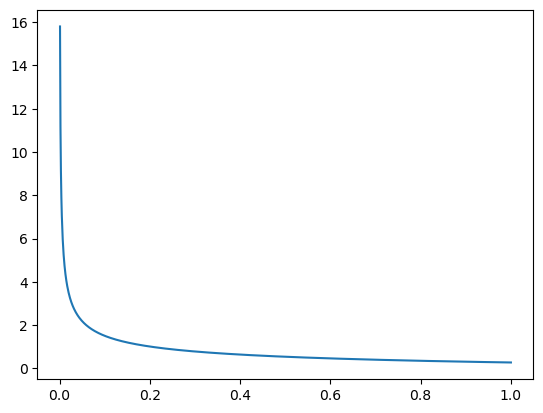

In [123]:
def f(x): 
    return (x**(-(1/2))/(np.exp(x)+1))

x = np.linspace(0.001,1,1000)
plt.plot(x,f(x))

In [135]:
# Let's use importance sampling method
def w(x):
    return x**(-(1/2))

N = 1000
x_sample = npr.uniform(0.001,1, N)**2
I = (2/N)*np.sum(f(x_sample)/w(x_sample))

print(f"The integral with importance sampling is {I}")

The integral with importance sampling is 0.8326797679828576
